In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

import shap

In [64]:
data = pd.read_csv('/kaggle/input/mobile-pricecsv/mobile_price.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1864,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1865,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1866,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [65]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [66]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [67]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,...,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,1239.870985,0.496253,1.519058,0.511242,4.323340,0.520878,32.199679,0.501392,140.517666,4.511242,...,644.650964,1253.185225,2136.510171,12.309957,5.761242,10.934690,0.761777,0.503747,0.505889,1.511242
std,440.491493,0.500120,0.815589,0.500007,4.354824,0.499698,18.160543,0.289188,35.361447,2.282272,...,440.859317,431.674613,1086.110144,4.207495,4.372304,5.449089,0.426110,0.500120,0.500099,1.121147
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,283.500000,877.000000,1210.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.500000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,565.500000,1248.500000,2170.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1617.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,945.250000,1633.000000,3086.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [68]:
data.nunique()

battery_power    1048
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1093
px_width         1074
ram              1483
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

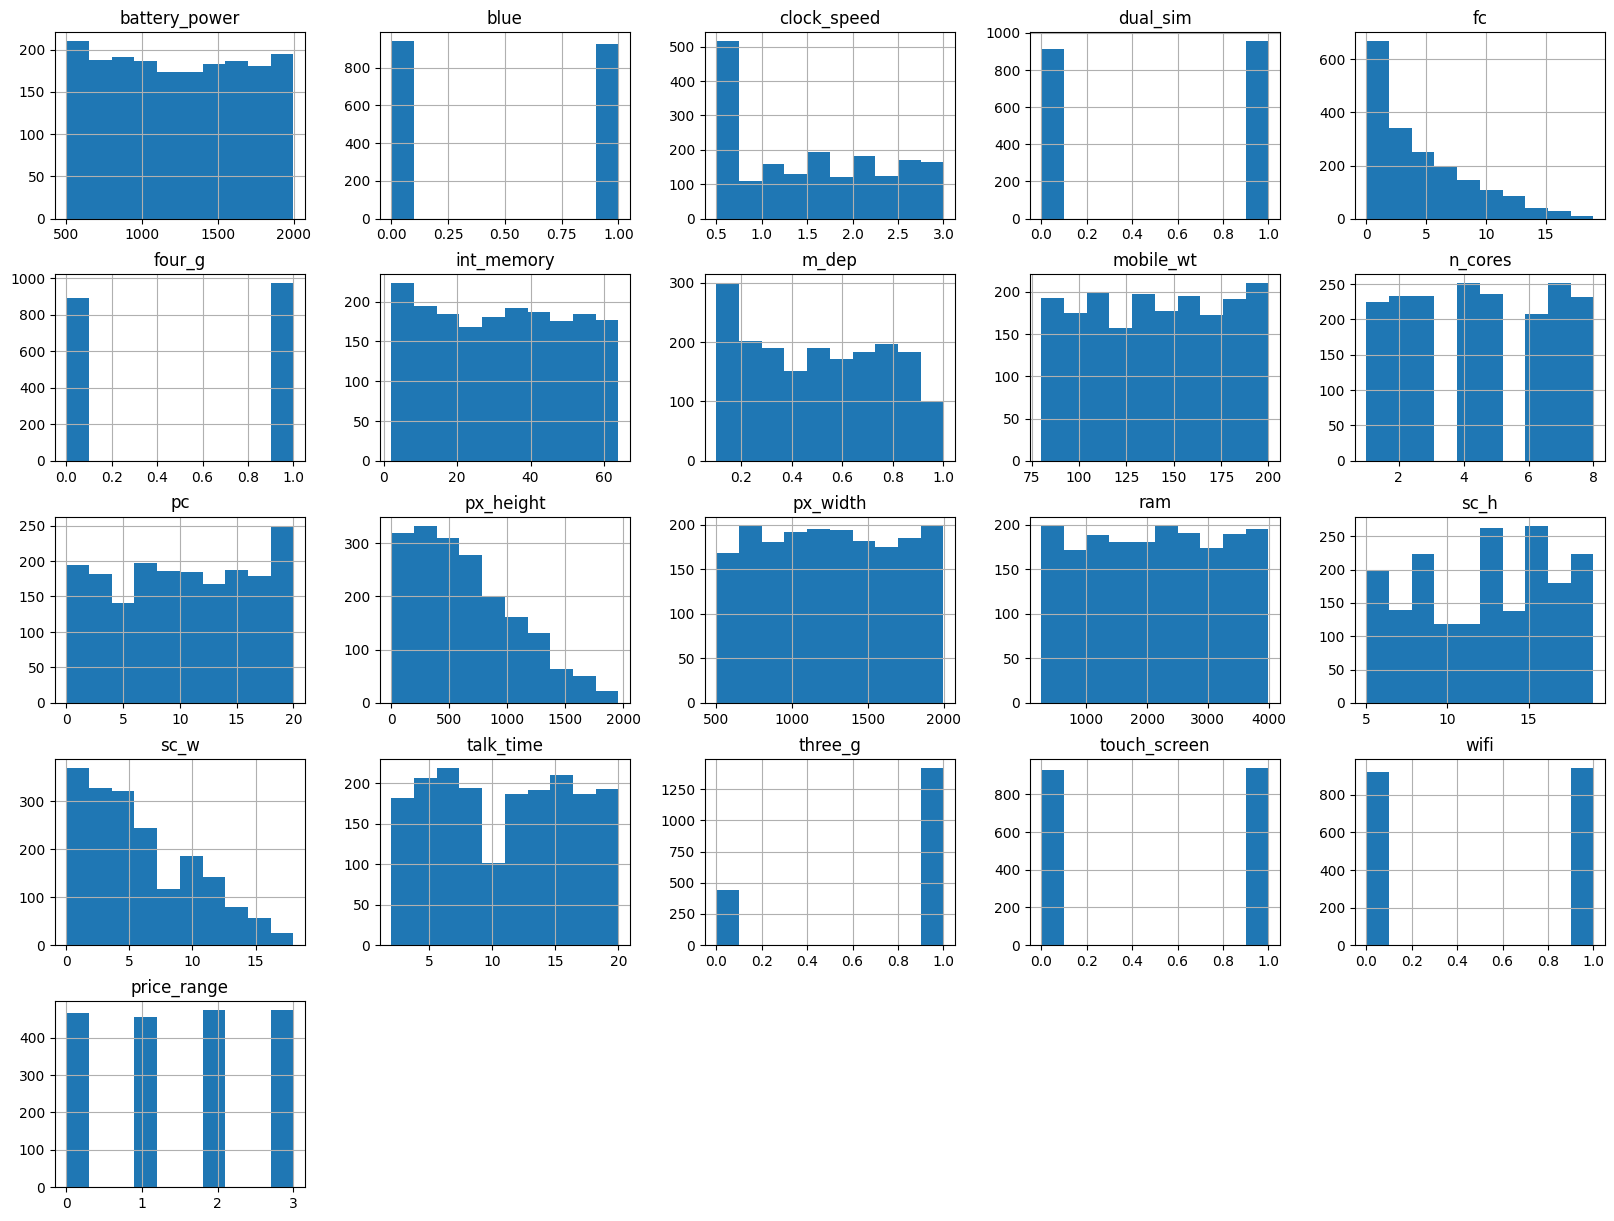

In [69]:
data.hist(figsize=(20, 15));
plt.show()

<Axes: >

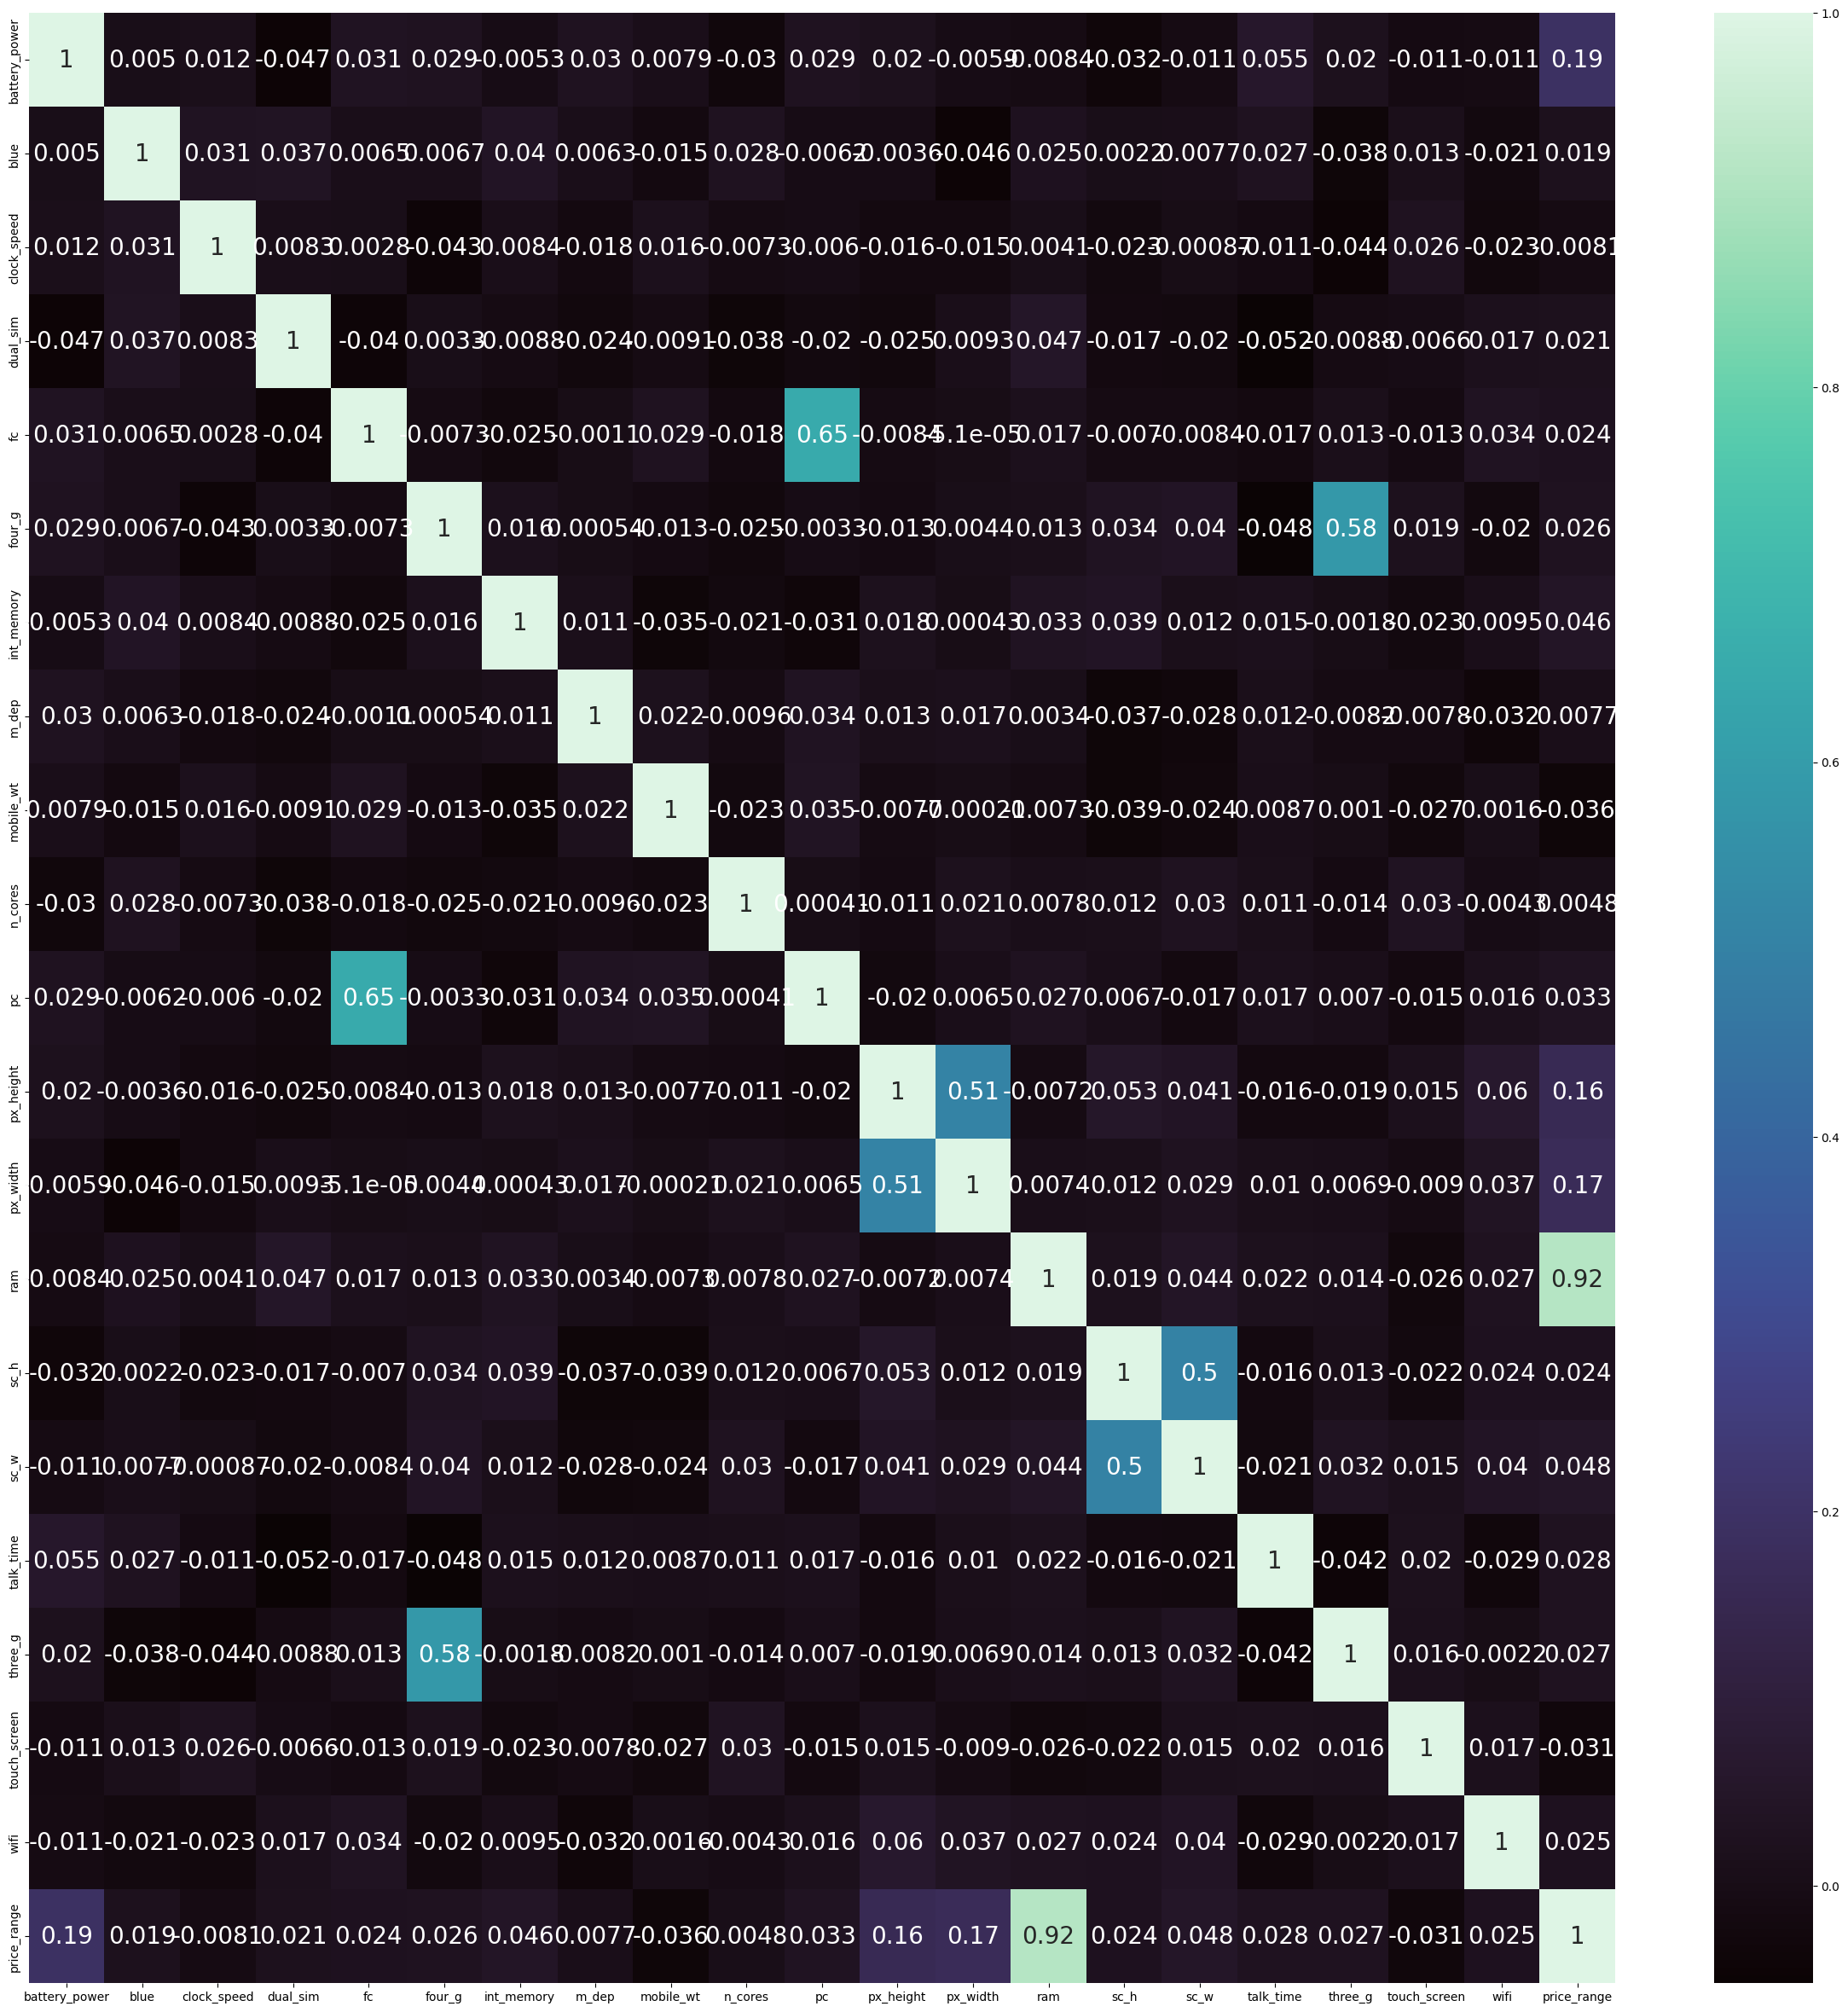

In [70]:
#heat map
#correlation
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="mako", annot_kws={"size":20})

In [71]:
data_out = data[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi','price_range']]

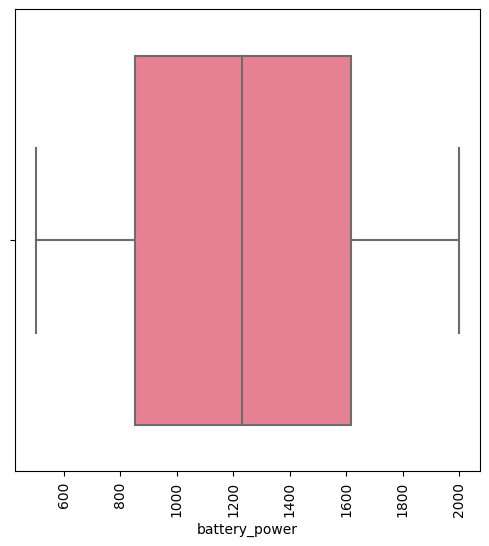

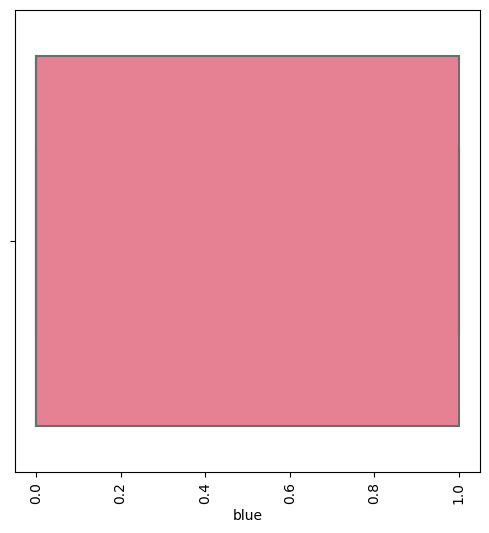

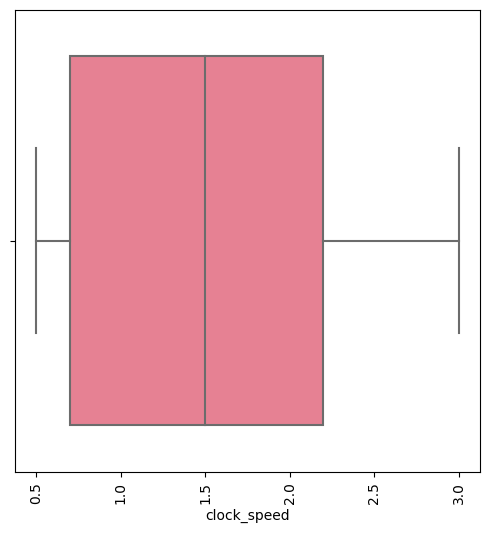

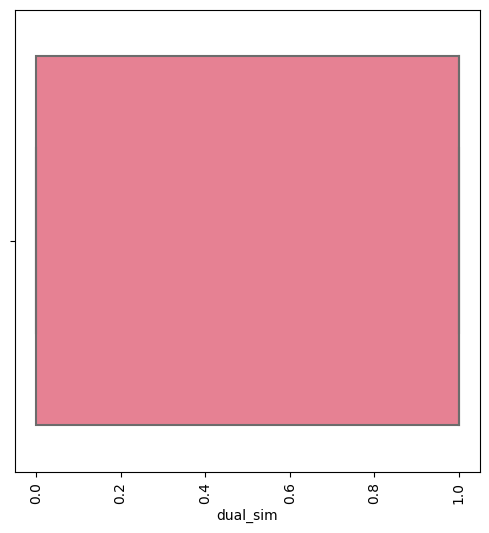

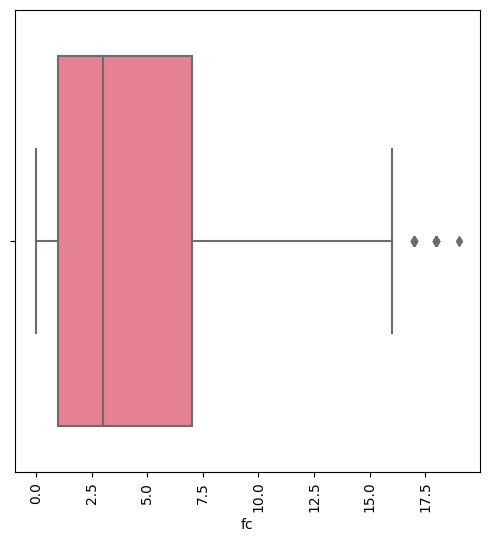

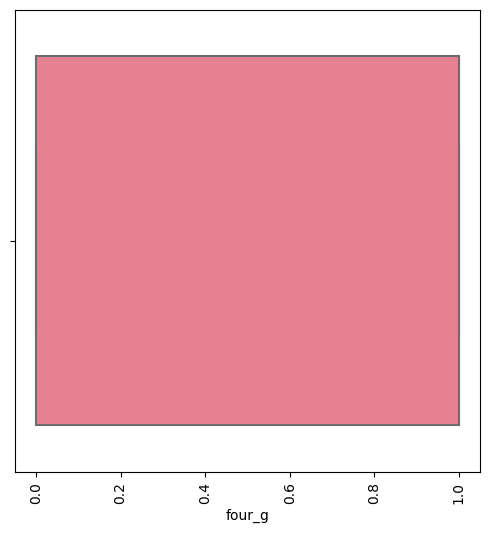

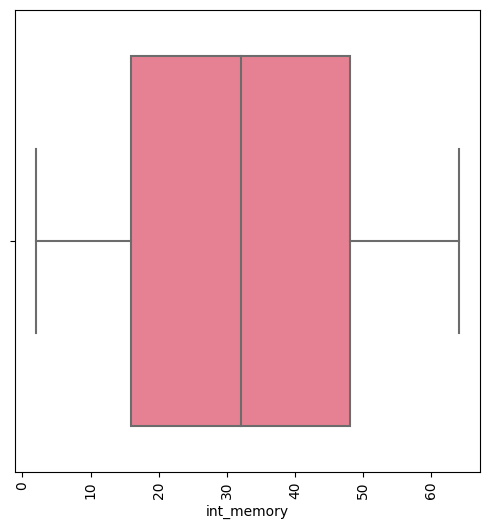

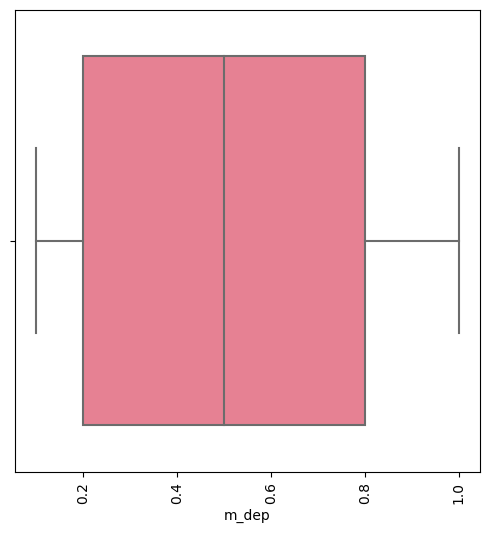

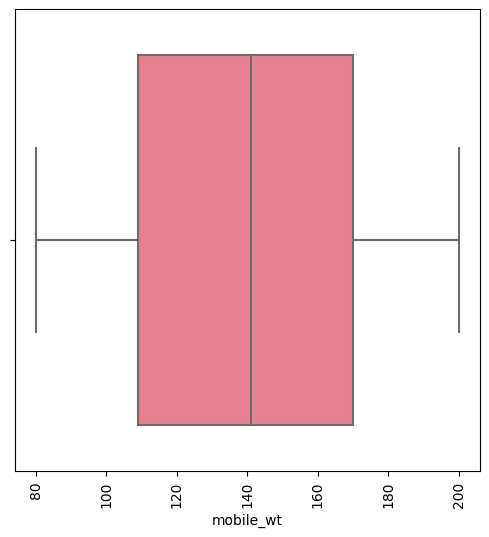

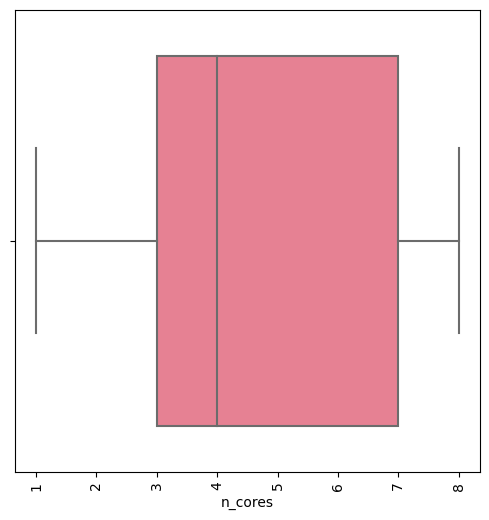

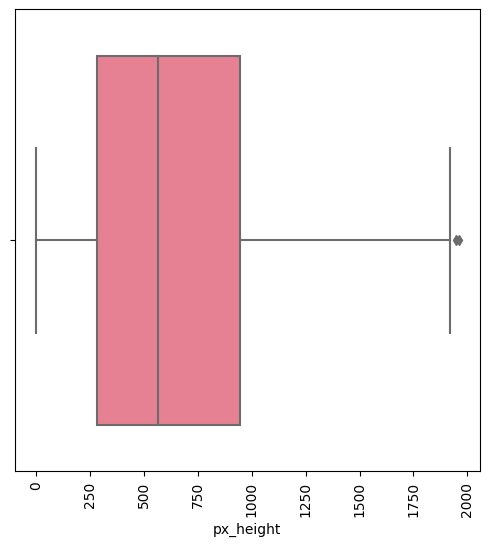

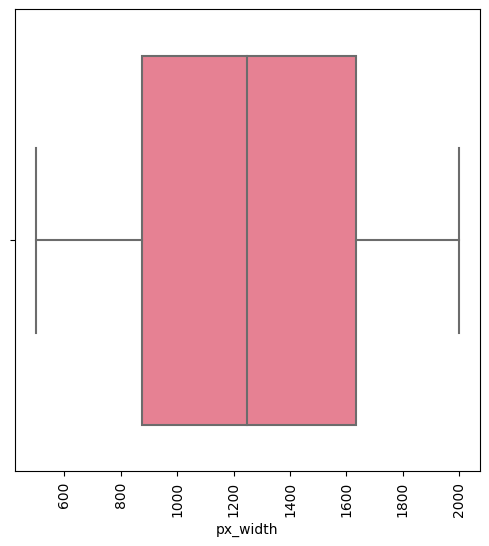

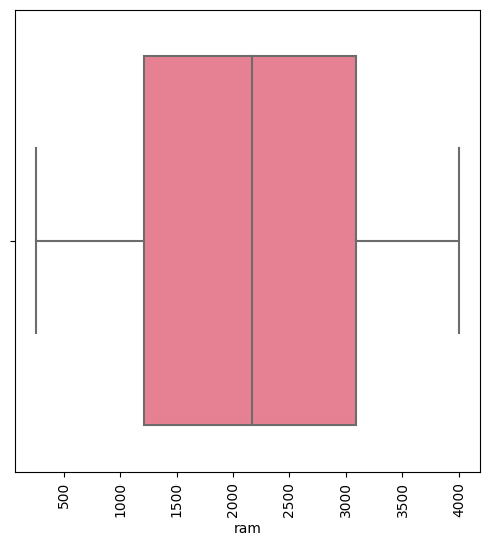

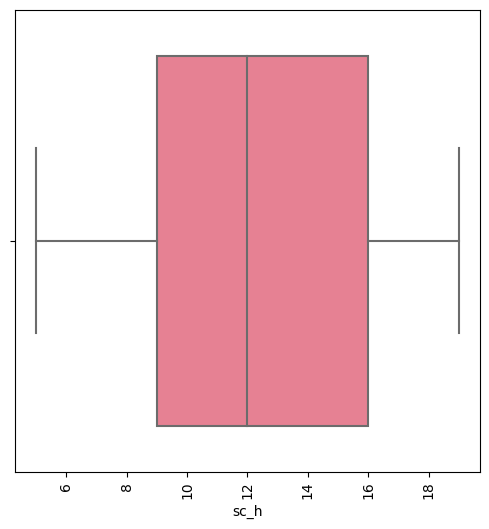

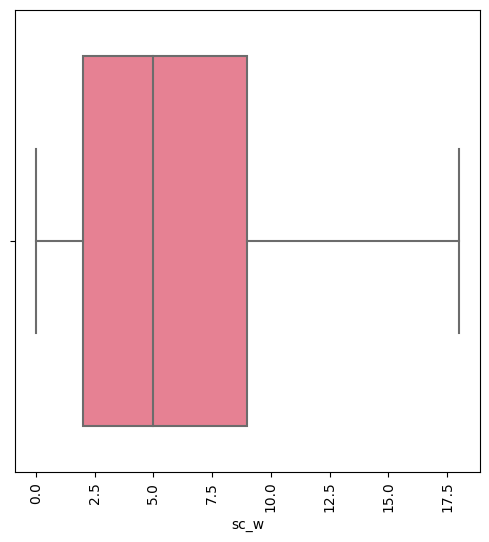

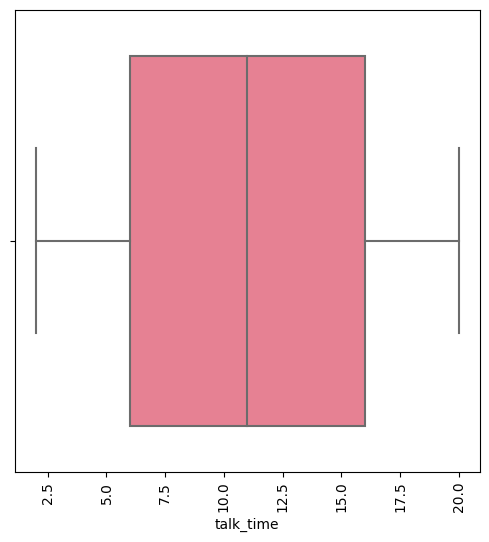

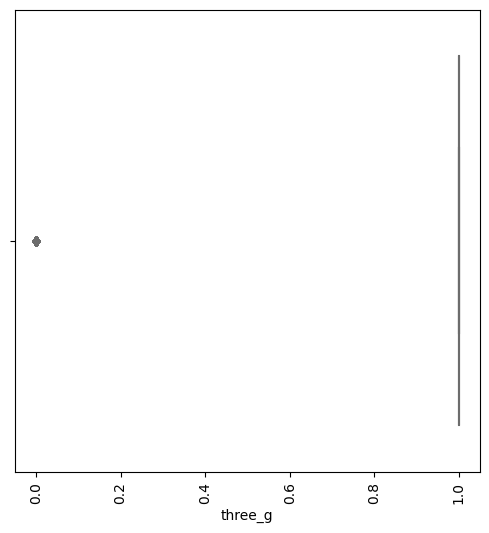

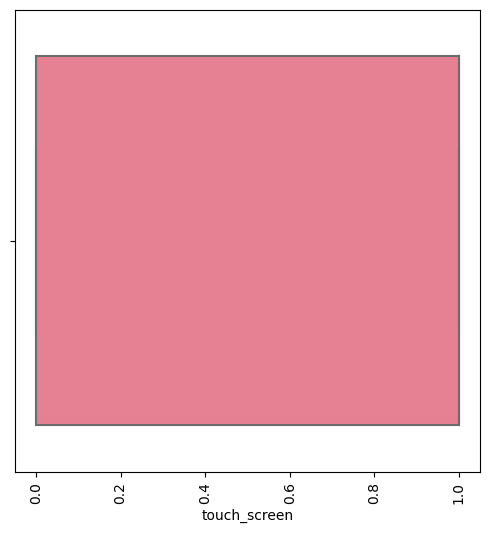

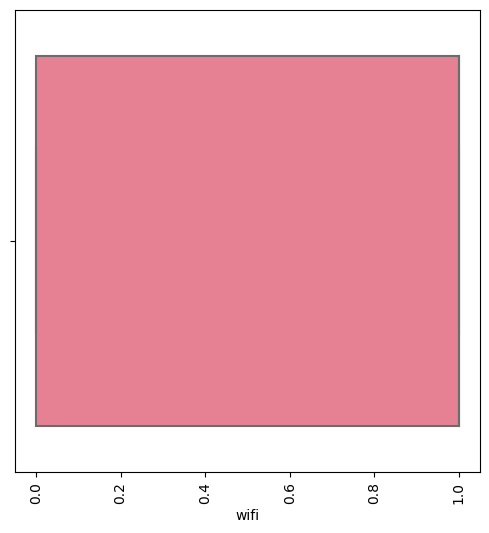

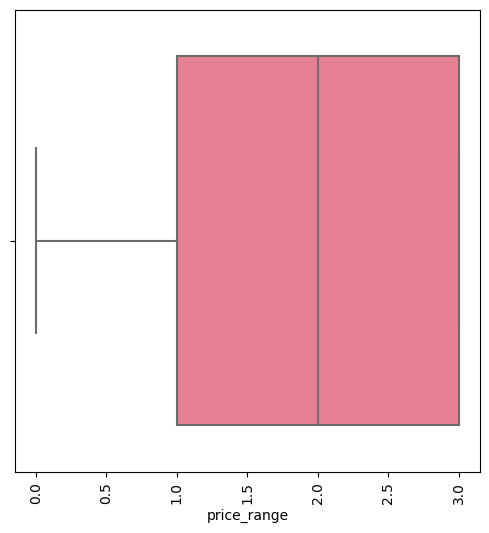

In [72]:
for j in data_out.columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(x=data[j][1:], data=data.iloc[:1],
                order=data_out[j][1:].value_counts().index,
                palette='husl')
    plt.xticks(rotation=90)
    plt.show()

In [73]:
data.shape

(1868, 21)

In [74]:
data = data[data["fc"]<12]
data.shape


(1705, 21)

In [75]:
data = data[data["px_height"]<1750]
data.shape

(1684, 21)

In [76]:
data = data[data["three_g"]>0.8]
data.shape

(1272, 21)

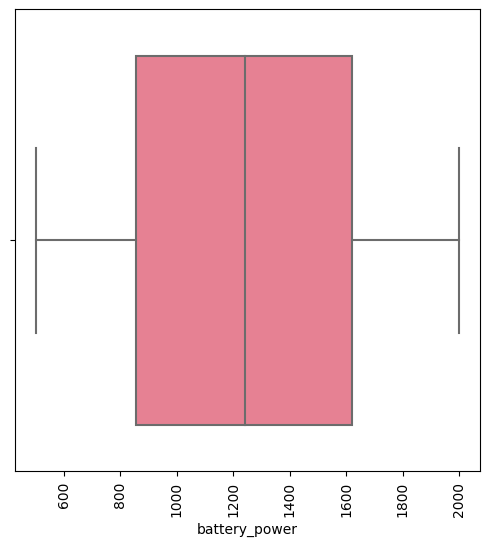

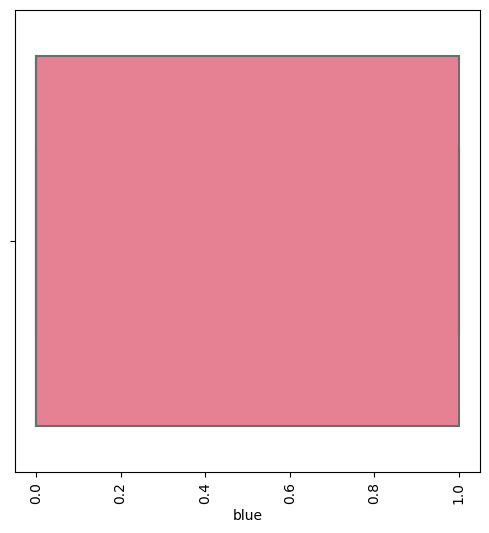

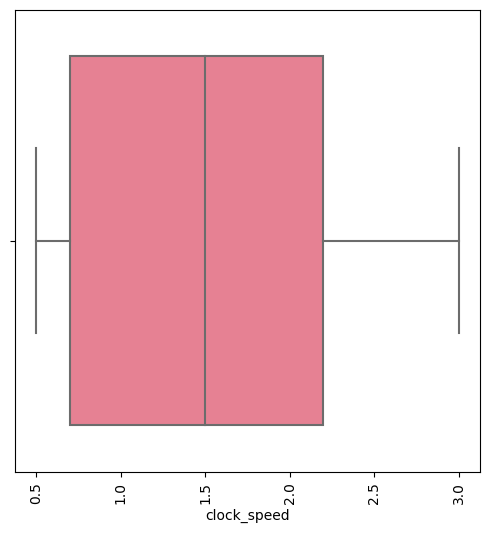

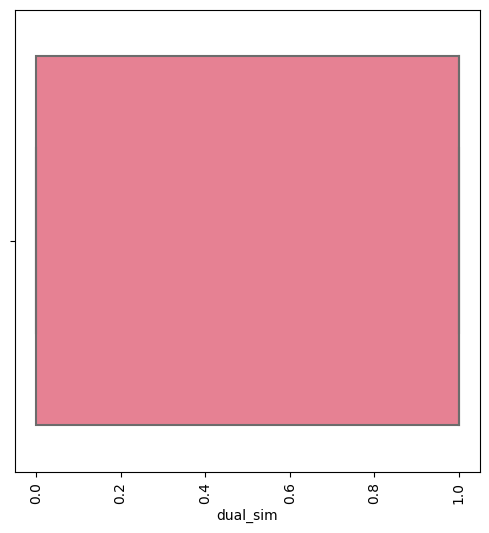

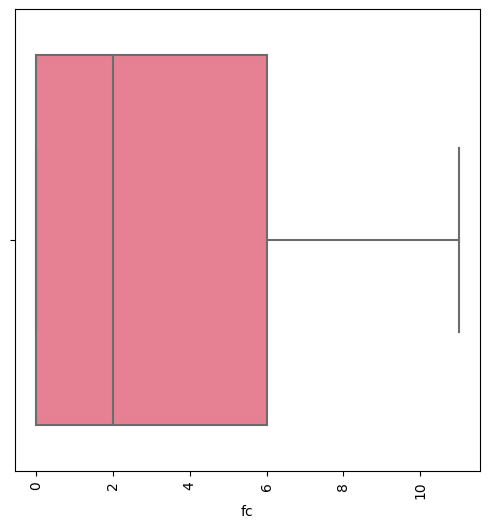

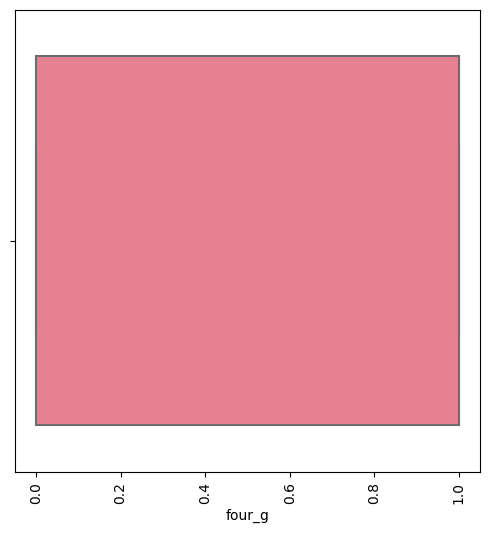

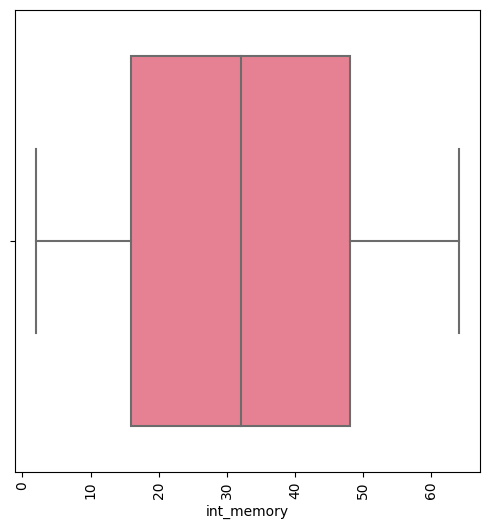

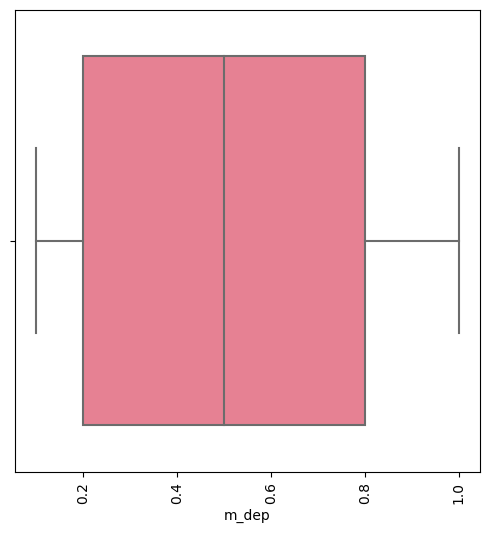

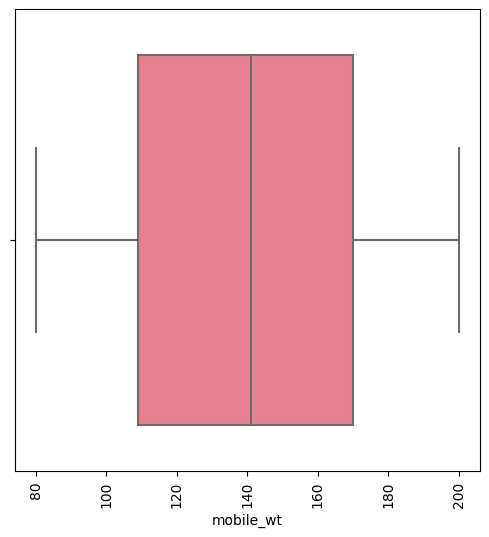

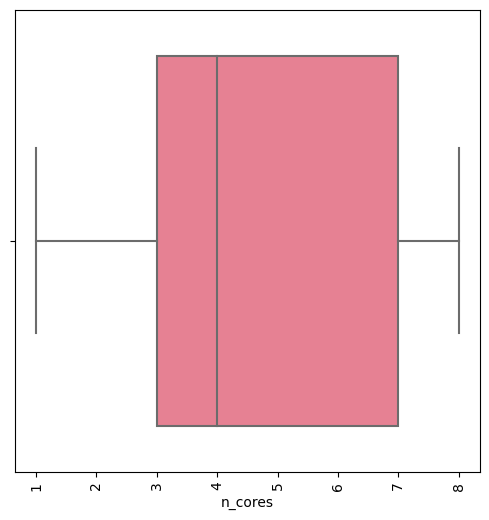

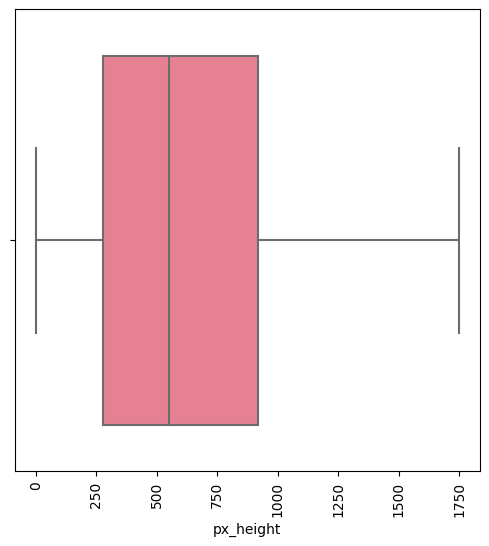

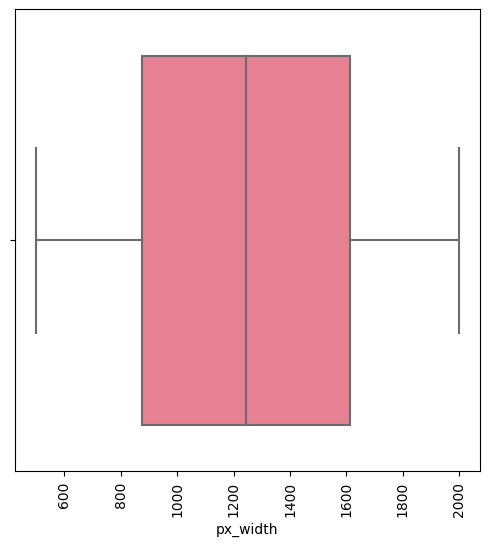

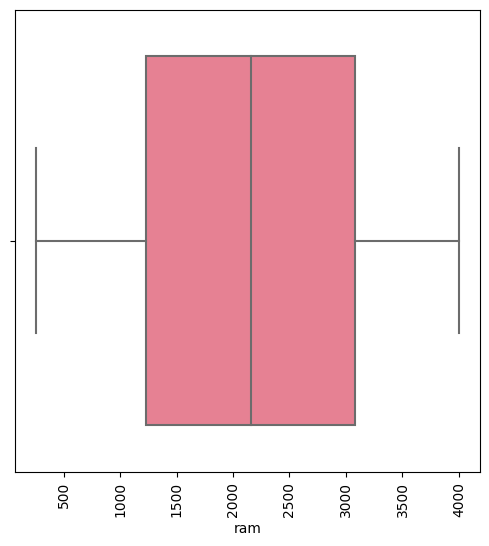

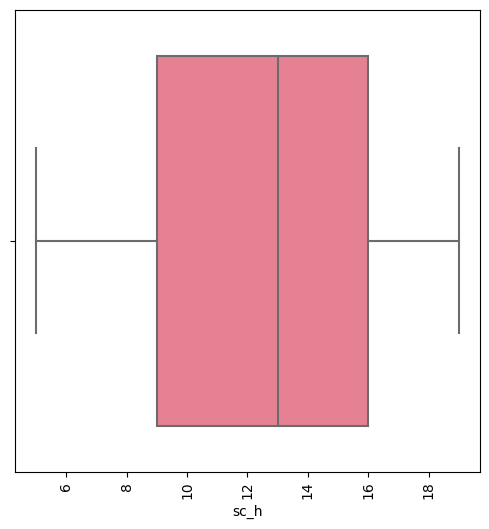

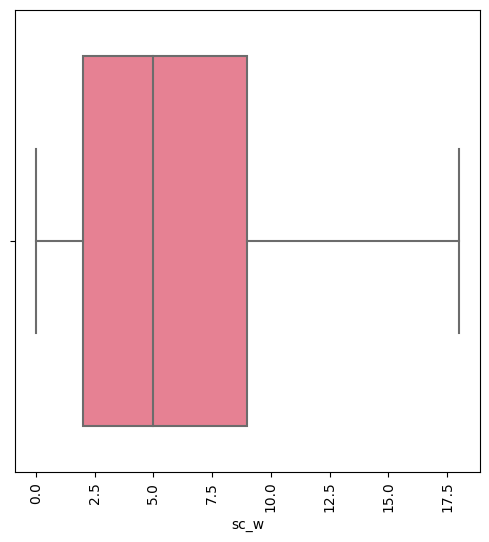

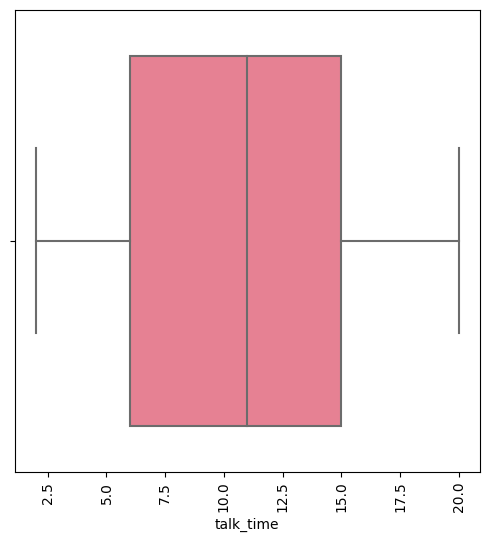

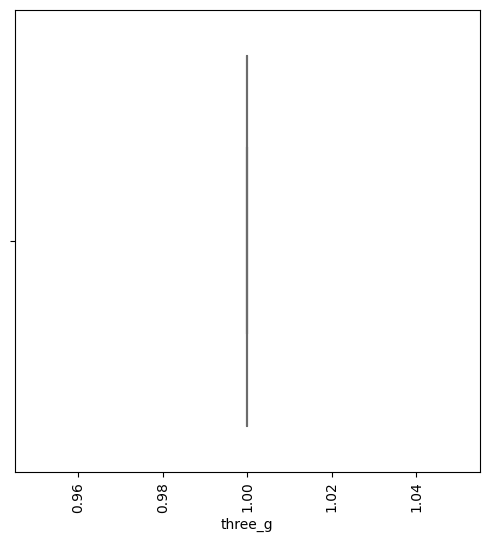

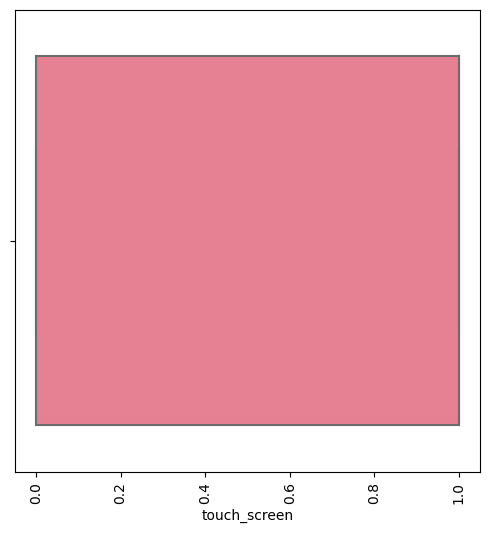

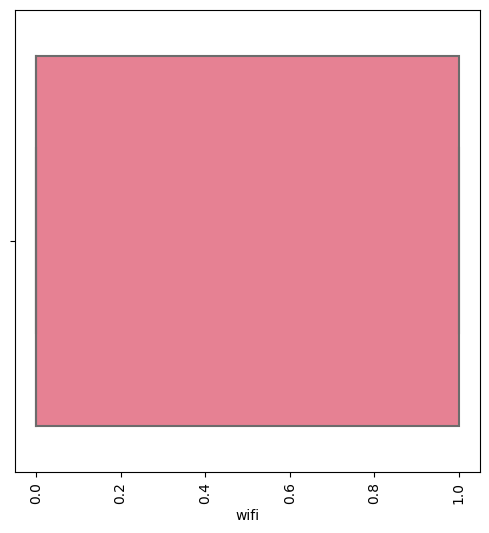

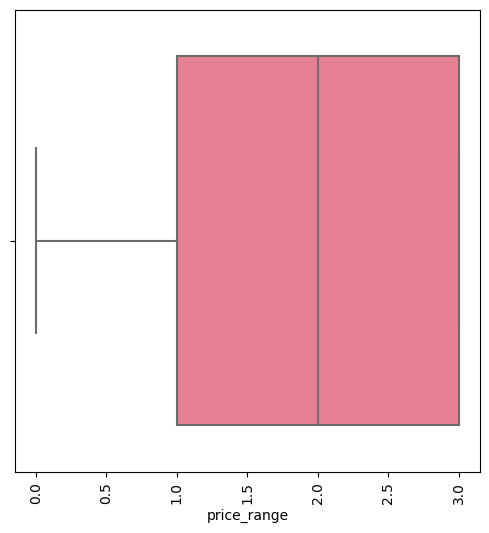

In [77]:
for j in data_out.columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(x=data[j][1:], data=data.iloc[:1],
                order=data_out[j][1:].value_counts().index,
                palette='husl')
    plt.xticks(rotation=90)
    plt.show()

In [78]:
scaled_features=data.drop('price_range',axis=1)

In [79]:
data_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_feat.head()



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1


In [80]:
y = data['price_range']
X = data.drop(['price_range'], axis=1)

# Train Test Split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, random_state=42)

# SVC model

In [83]:
model = SVC(C=1000,gamma= 0.0001,kernel= 'rbf',random_state=45)

In [84]:
model.fit(X_train,y_train)

SVC(C=1000, gamma=0.0001, random_state=45)

In [85]:
predictions = model.predict(X_test)

In [86]:
print(confusion_matrix(y_test,predictions))

[[27  2  0 73]
 [ 1 43  1 43]
 [ 0  2 47 51]
 [ 0  0  5 87]]


In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.26      0.42       102
           1       0.91      0.49      0.64        88
           2       0.89      0.47      0.61       100
           3       0.34      0.95      0.50        92

    accuracy                           0.53       382
   macro avg       0.78      0.54      0.54       382
weighted avg       0.78      0.53      0.54       382



# Gridsearch

In [88]:
param_grid = {'C': [0.1,1, 10, 100, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001,200], 'kernel': ['linear']} 

In [89]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

In [90]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 5000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 200],
                         'kernel': ['linear']},
             verbose=1)

In [91]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [92]:
grid.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [93]:
grid_predictions = grid.predict(X_test)

In [94]:
print(confusion_matrix(y_test,grid_predictions))

[[101   1   0   0]
 [  1  87   0   0]
 [  0   1  94   5]
 [  0   0   2  90]]


In [95]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       102
           1       0.98      0.99      0.98        88
           2       0.98      0.94      0.96       100
           3       0.95      0.98      0.96        92

    accuracy                           0.97       382
   macro avg       0.97      0.97      0.97       382
weighted avg       0.97      0.97      0.97       382



In [96]:
pd.DataFrame(grid_predictions)

,0
0,0
1,0
2,1
3,0
4,1
...,...
377,0
378,0
379,0
380,3


In [97]:
td=pd.read_csv('/kaggle/input/mobile-price-test-hiddencsv/mobile_price_test_hidden.csv')
td

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,950,0,0.5,0,6,1,55,0.1,124,8,7,86,1681,1305,6,5,4,1,0,1
1,948,0,1.5,1,6,0,18,0.3,119,4,7,340,1728,2926,17,13,9,1,1,1
2,1328,1,0.5,0,5,1,27,0.3,144,3,18,602,1156,2674,7,2,5,1,0,1
3,1447,0,0.5,0,3,0,40,0.7,184,2,5,963,1062,471,8,4,20,0,0,1
4,1973,1,0.5,1,3,0,21,0.8,95,8,7,127,507,1724,12,10,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1028,1,2.8,0,1,1,30,0.1,193,1,10,1801,1923,1424,18,4,13,1,0,1
128,1831,1,2.2,1,4,0,55,1.0,189,8,9,1693,1790,1133,14,3,10,0,1,0
129,571,1,2.0,1,5,1,58,0.6,101,6,11,31,1536,555,19,10,11,1,0,1
130,1770,1,2.3,0,0,0,9,0.6,183,6,5,1098,1373,3785,13,10,14,1,0,1


In [98]:
td_s = td.copy()
std_scaler = StandardScaler()
td_s.iloc[:, [0, 1, 2, 3]] = std_scaler.fit_transform(td_s.iloc[:, [0, 1, 2, 3]])
td_s.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.636101,-0.955533,-1.300908,-0.970143,6,1,55,0.1,124,8,7,86,1681,1305,6,5,4,1,0,1
1,-0.640824,-0.955533,-0.082172,1.030776,6,0,18,0.3,119,4,7,340,1728,2926,17,13,9,1,1,1
2,0.256494,1.046536,-1.300908,-0.970143,5,1,27,0.3,144,3,18,602,1156,2674,7,2,5,1,0,1
3,0.537497,-0.955533,-1.300908,-0.970143,3,0,40,0.7,184,2,5,963,1062,471,8,4,20,0,0,1
4,1.779574,1.046536,-1.300908,1.030776,3,0,21,0.8,95,8,7,127,507,1724,12,10,8,0,0,1


In [99]:
from sklearn.preprocessing import MinMaxScaler
td_n = td.copy()
min_max_scaler = MinMaxScaler()
td_n.iloc[:, [0, 1, 2, 3]] = min_max_scaler.fit_transform(td_n.iloc[:, [0, 1, 2, 3]])
td_n.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.297901,0,0.0,0,6,1,55,0.1,124,8,7,86,1681,1305,6,5,4,1,0,1
1,0.296547,0,0.4,1,6,0,18,0.3,119,4,7,340,1728,2926,17,13,9,1,1,1
2,0.553825,1,0.0,0,5,1,27,0.3,144,3,18,602,1156,2674,7,2,5,1,0,1
3,0.634394,0,0.0,0,3,0,40,0.7,184,2,5,963,1062,471,8,4,20,0,0,1
4,0.990521,1,0.0,1,3,0,21,0.8,95,8,7,127,507,1724,12,10,8,0,0,1


In [100]:
prediction=model.predict(td)
print(predictions)

[0 0 3 3 1 3 0 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 1 0 3 3 3 3 3 1 3 2 3 3
 3 3 2 2 0 3 3 1 3 1 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3 3 0 0 3 1 1 3 2 3 3 2 3
 2 3 2 3 2 3 3 3 3 3 3 3 3 2 3 3 3 3 1 3 3 3 3 2 3 3 3 2 3 3 3 0 1 3 2 3 3
 1 3 1 3 0 1 2 1 3 3 3 1 1 3 3 3 2 3 1 3 3 3 3 2 2 1 3 3 3 3 3 3 3 2 3 1 3
 0 1 0 3 2 3 2 3 2 0 3 3 3 1 3 3 1 2 2 2 3 3 0 3 3 3 3 3 3 3 3 3 1 1 3 3 3
 3 2 3 3 3 3 1 3 3 2 3 0 1 3 0 0 3 3 2 2 2 3 2 1 3 3 3 1 3 3 3 1 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 0 3 3 3 3 3 3 3 1 3 3 1 3 3 0 1 0 3 0 3 2
 3 3 3 3 3 2 1 3 3 2 3 3 1 1 3 0 3 2 2 2 3 3 3 0 3 3 1 3 2 3 2 3 2 3 2 1 2
 3 0 3 3 0 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 1 3 3 2 3 1 3 2 3 3 0 3 2 3
 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 0 2 3 3 3 3 3 1 3 3 1
 3 3 3 3 1 1 3 0 3 0 3 2]


In [108]:
prediction = pd.DataFrame(predictions)

In [106]:
prediction.to_csv('prediction_Amiraamer.csv',index = False)

In [107]:
prediction

,0
0,0
1,0
2,3
3,3
4,1
...,...
377,0
378,3
379,0
380,3
